In [3]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astrodatapy.number_density import number_density
from astrodatapy.correlation    import correlation
from astrodatapy.clustering     import clustering
import numpy as np

cosmo = {'omega_M_0' : 0.308,
'omega_lambda_0' : 0.692,
'omega_b_0' : 0.04839912,
'omega_n_0' : 0.0,
'N_nu' : 0,
'h' : 0.678,
'n' : 0.968,
'sigma_8' : 0.815
}

plt.rc('font', size=15)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize

colors         = ['#e41a1c','#377eb8','#4daf4a','#984ea3',\
                  '#ff7f00','#a65628','#f781bf','#999999']*4
color_maps     = ['Reds', 'Blues', 'Greens'] *4
markers        = ['o','s','v','^','<','>','p','*','D','.','8']*4
linestyles     = ['-','--','-.',':']*4

/Users/nadavoutmezguine/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/Users/nadavoutmezguine/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in log10
/Users/nadavoutmezguine/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in subtract
/Users/nadavoutmezguine/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:3371: RuntimeWarning: invalid value encountered in double_scalars
  high = [v + e for v, e in zip(data, b)]


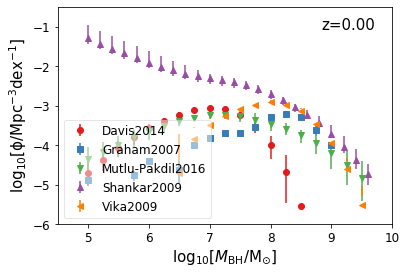

In [4]:
feature = 'BHMF'
xlim    = (4.5, 10)
ylim    = (-6, -0.5)
xlabel  = r"$\log_{10}[M_{\rm BH}/{\rm M_{\odot}}]$"
ylabel  = r"$\log_{10}[\rm \phi/Mpc^{-3} dex^{-1}]$"
zs      = [0.0, ]

for z in zs:
    fig,ax = plt.subplots(1,1)
    obs    = number_density(feature=feature,z_target=z,quiet=1,h=cosmo['h'])
    j_data = 0
    k_func = 0
    for ii in range(obs.n_target_observation):
        data       = obs.target_observation['Data'][ii]
        label      = obs.target_observation.index[ii]
        datatype   = obs.target_observation['DataType'][ii]
        color      = colors[ii]
        marker     = markers[j_data]
        linestyle  = linestyles[k_func]
        data[:,1:] = np.log10(data[:,1:])
        if datatype == 'data':
            ax.errorbar(data[:,0],  data[:,1], yerr = [data[:,1]-data[:,3],data[:,2]- data[:,1]],\
                        label=label,color=color,fmt=marker)
            j_data +=1
        elif datatype == 'dataULimit':
            ax.errorbar(data[:,0],  data[:,1], yerr = -0.2*data[:,1], uplims=True,\
                        label=label,color=color,fmt=marker)
            j_data +=1
        else:
            ax.plot(data[:,0],data[:,1],label=label,color=color,linestyle=linestyle,lw=3)
            ax.fill_between(data[:,0], data[:,2],data[:,3],color=color,alpha=0.5)
            k_func +=1

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.text(0.95,0.95, "z=%.2f"%z,horizontalalignment='right',\
          verticalalignment='top',transform=ax.transAxes)
    leg = ax.legend(loc='lower left')
    leg.get_frame().set_alpha(0.5)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

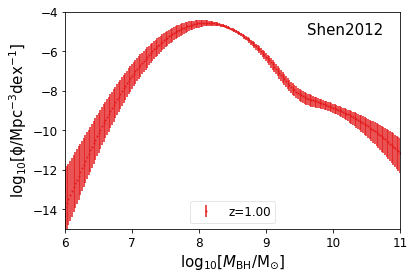

In [7]:
xlim    = (6, 11)
ylim    = (-15, -4)
xlabel  = r"$\log_{10}[M_{\rm BH}/{\rm M_{\odot}}]$"
ylabel  = r"$\log_{10}[\rm \phi/Mpc^{-3} dex^{-1}]$"
zs      = [1.0, ]#0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.15,2.65,3.2,3.75,4.25,4.75, ]

fig,ax = plt.subplots(1,1)
for z, color in zip(zs, colors):
    obs    = number_density(feature=feature,z_target=z,z_tol=0.05,quiet=1,h=cosmo['h'])
    j_data = 0
    k_func = 0
    for ii in range(obs.n_target_observation):
        if obs.target_observation.index[ii] != "Shen2012":
            continue
        data       = obs.target_observation['Data'][ii]
        label      = "z=%.2f"%z
        datatype   = obs.target_observation['DataType'][ii]
        marker     = markers[j_data]
        linestyle  = linestyles[k_func]
        data[:,1:] = np.log10(data[:,1:])
        if datatype == 'data':
            ax.errorbar(data[:,0],  data[:,1], yerr = [data[:,1]-data[:,3],data[:,2]- data[:,1]],\
                        label=label,color=color,fmt=marker,markersize=1)
            j_data +=1
        elif datatype == 'dataULimit':
            ax.errorbar(data[:,0],  data[:,1], yerr = -0.2*data[:,1], uplims=True,\
                        label=label,color=color,fmt=marker)
            j_data +=1
        else:
            ax.plot(data[:,0],data[:,1],label=label,color=color,linestyle=linestyle,lw=3)
            ax.fill_between(data[:,0], data[:,2],data[:,3],color=color,alpha=0.5)
            k_func +=1

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.text(0.95,0.95, "Shen2012",horizontalalignment='right',\
          verticalalignment='top',transform=ax.transAxes)
    leg = ax.legend(loc='lower center', ncol=2)
    leg.get_frame().set_alpha(0.5)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)